In [1]:
import requests
import spotipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from requests.auth import HTTPBasicAuth
from client import client_id, client_secret

In [2]:
token_url = "https://accounts.spotify.com/api/token"
headers = {'content-type': 'application/x-www-form-urlencoded'}

token_params = {"grant_type" : "client_credentials"}

token_json = requests.post(token_url, params = token_params, headers = headers, auth = (client_id, client_secret)).json()
token = token_json['access_token']

In [3]:
token_headers = {'authorization': f"Bearer {token}"}

US_top50_df = pd.read_csv("Top Country CSV/US_top_50.csv")

artist_count = 0
genres = []
genre_count = []

search_artist_url = "https://api.spotify.com/v1/artists/"

for artist_id in US_top50_df["Artist ID"]:
    artist_url = search_artist_url + artist_id
    
    artist_json = requests.get(artist_url, headers = token_headers).json()
    
    try:
        genres_list = artist_json["genres"]
        
        for genre in genres_list:
            if genre not in genres:
                genres.append(genre)
                genre_count.append(1)

            else:
                genre_count[genres.index(genre)] += 1
                
        artist_count += 1
                
    except (KeyError, IndexError):
        print(f"Artist ID not found | {artist_id}")
        
genre_zip = zip(genres, genre_count)
sorted_genre_zip = sorted(genre_zip, key = lambda count : count[1], reverse = True)

genre = list(zip(*sorted_genre_zip))[0]
genre_count = list(zip(*sorted_genre_zip))[1]

In [4]:
genre_popularity_df = pd.DataFrame({"Genres" : genre, "Genre Counts" : genre_count})
genre_popularity_df["Genre Popularity Percentage"] = (genre_popularity_df["Genre Counts"]/artist_count) * 100
genre_popularity_df.head()

,Genres,Genre Counts,Genre Popularity Percentage
0,pop,30,60.0
1,rap,24,48.0
2,trap music,17,34.0
3,dance pop,15,30.0
4,pop rap,14,28.0


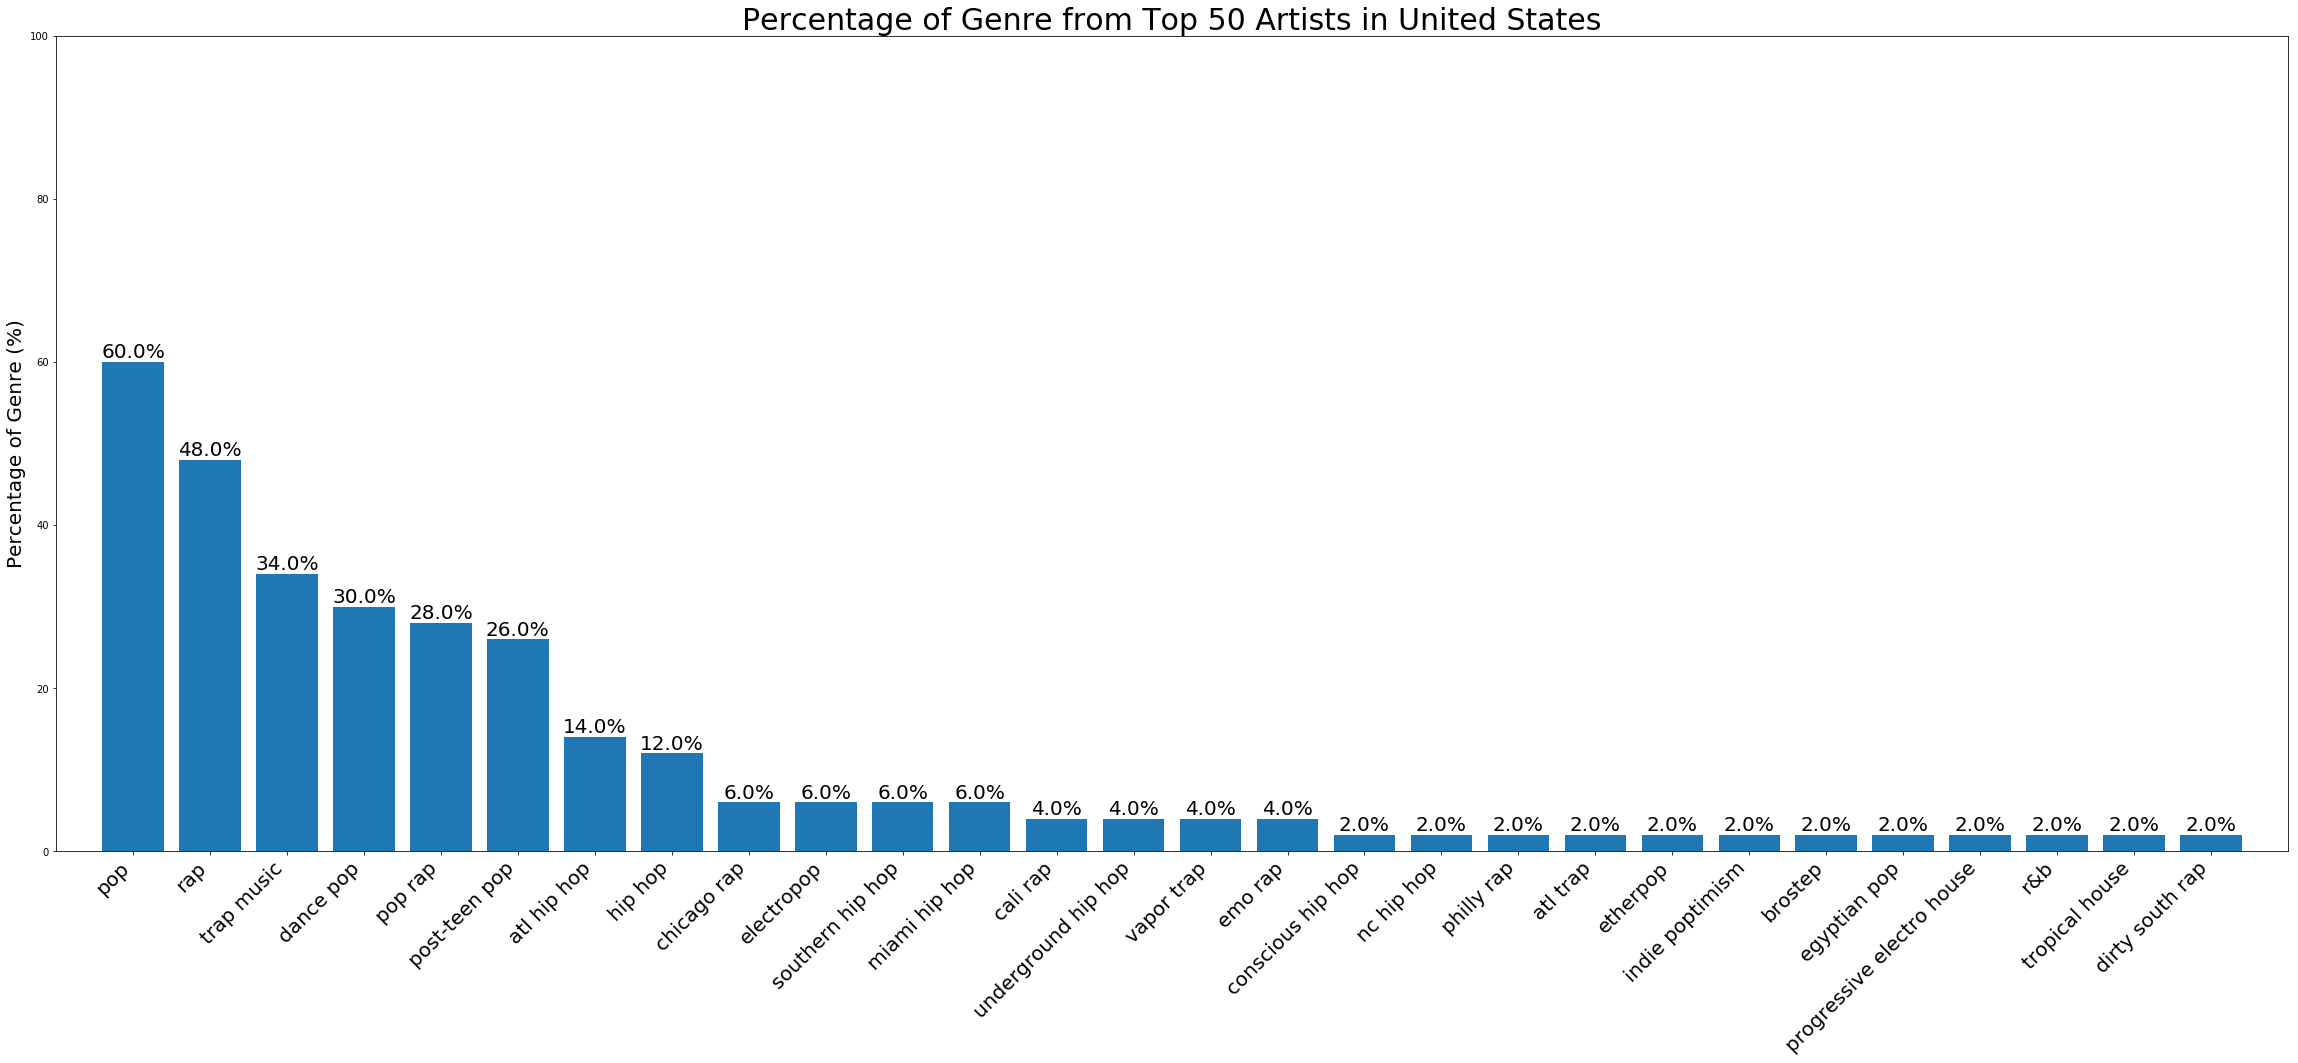

In [5]:
fig, ax = plt.subplots(figsize = (40,15))

x_axis = np.arange(len(genre))
y_axis = genre_popularity_df["Genre Popularity Percentage"]

ax.bar(x_axis, y_axis)
plt.xticks(x_axis, genre_popularity_df["Genres"],Fontsize = 20, rotation = 45, ha = "right")
plt.xlim(min(x_axis) - 1, max(x_axis) + 1)
plt.ylim(0, 100)
plt.ylabel("Percentage of Genre (%)", Fontsize = 20)
plt.title("Percentage of Genre from Top 50 Artists in United States", Fontsize = 30)
# plt.text()

rects = ax.patches

for rect in rects:
    box_width = rect.get_width()
    height = rect.get_height()
    width = rect.get_x() + box_width / 2
    if height > 0:
        ax.text(width, height, f'{round(height,2)}%', Fontsize = 20, ha = 'center', va = 'bottom')
    else:
         ax.text(width, height, f'{round(height,2)}%', Fontsize = 20, ha = 'center', va = 'top')

plt.show()